In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report, log_loss


In [2]:
# Load the data from the csv file
df = pd.read_csv('CreditCardData.csv')

In [3]:
# Convert date and time columns to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H').dt.time

In [4]:
# Convert currency column to float
df['Amount'] = df['Amount'].replace('[\£,]', '', regex=True).astype(float)

In [5]:
# Drop irrelevant columns
df.drop(["Transaction ID", "Shipping Address"], axis=1, inplace=True)


In [6]:
# Fill missing values with mode
df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)
df["Age"].fillna(df["Age"].mode()[0], inplace=True)
df["Bank"].fillna(df["Bank"].mode()[0], inplace=True)

In [7]:
# Encode categorical variables as numerical values
label_encoder = LabelEncoder()
df["Type of Card"] = label_encoder.fit_transform(df["Type of Card"])
df["Entry Mode"] = label_encoder.fit_transform(df["Entry Mode"])
df["Type of Transaction"] = label_encoder.fit_transform(df["Type of Transaction"])
df["Merchant Group"] = label_encoder.fit_transform(df["Merchant Group"])
df["Country of Transaction"] = label_encoder.fit_transform(df["Country of Transaction"])
df["Country of Residence"] = label_encoder.fit_transform(df["Country of Residence"])
df["Gender"] = label_encoder.fit_transform(df["Gender"])
df["Bank"] = label_encoder.fit_transform(df["Bank"])

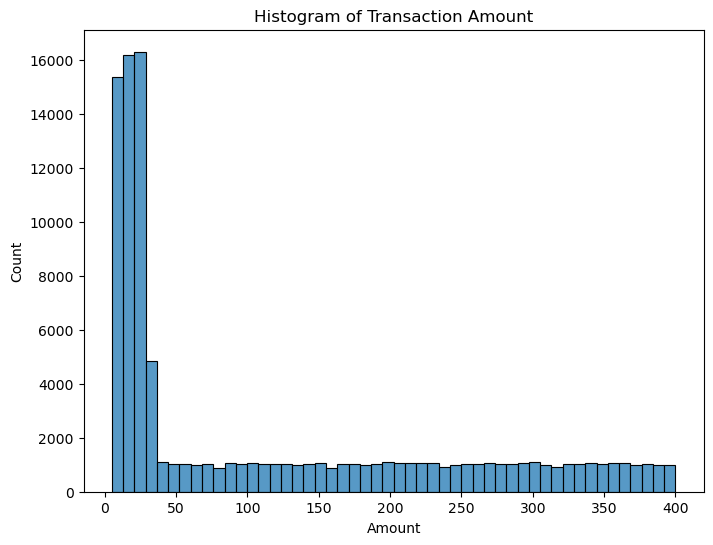

In [8]:
# Create a histogram of the transaction amount
plt.figure(figsize=(8,6))
sns.histplot(df['Amount'], bins=50)
plt.title('Histogram of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

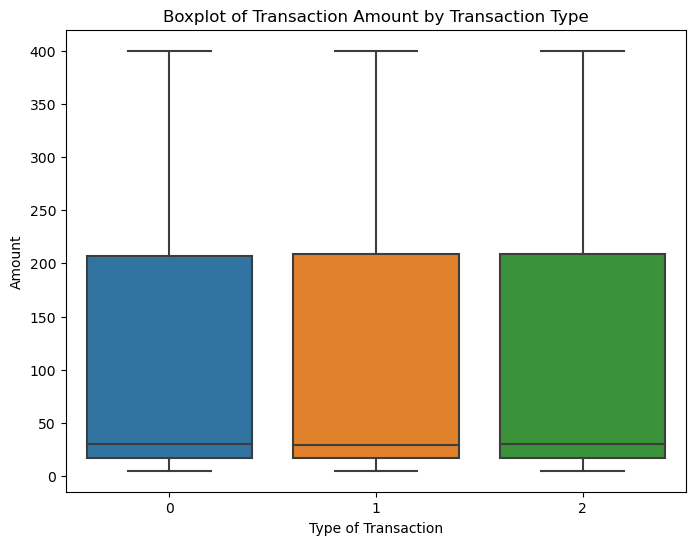

In [9]:
# Create a boxplot of the transaction amount by transaction type
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="Type of Transaction", y="Amount")
plt.title('Boxplot of Transaction Amount by Transaction Type')
plt.xlabel('Type of Transaction')
plt.ylabel('Amount')
plt.show()

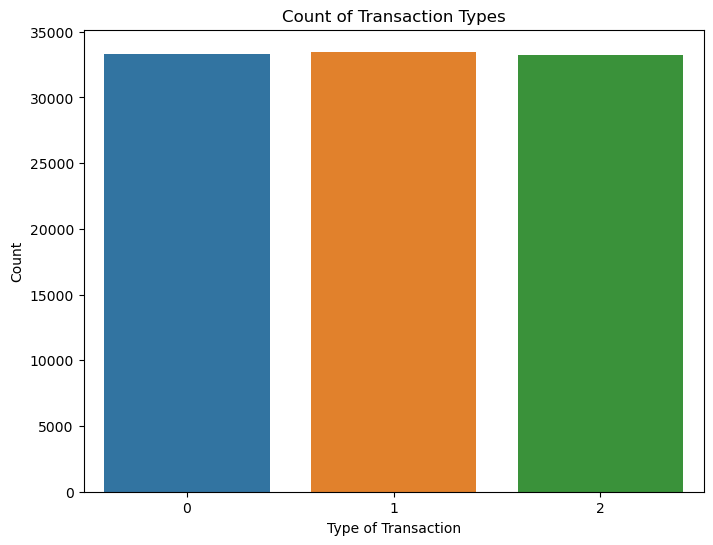

In [10]:
#count plot
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Type of Transaction')
plt.title('Count of Transaction Types')
plt.xlabel('Type of Transaction')
plt.ylabel('Count')
plt.show()

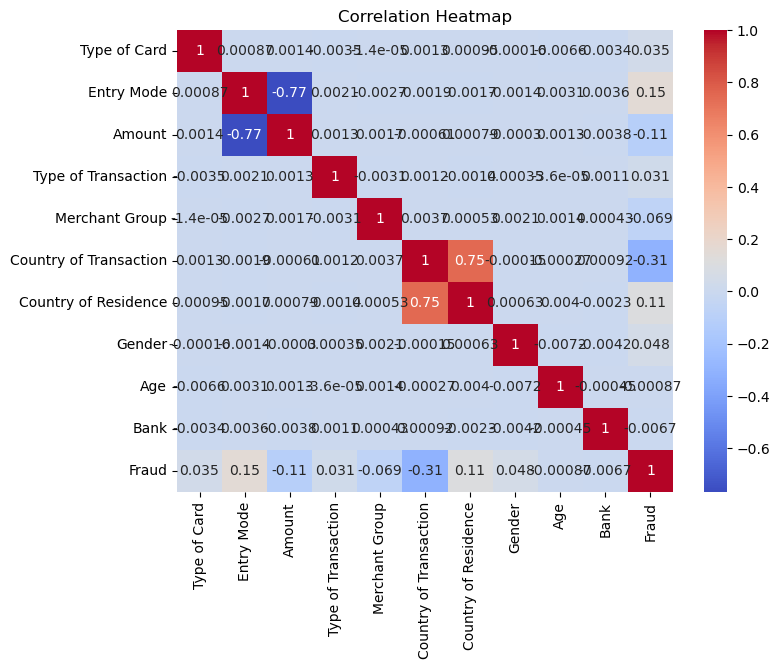

In [11]:
#heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [12]:
# Split data into test, validation, and testing sets
X = df.drop(["Date", "Time", "Fraud"], axis=1)
y = df["Fraud"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


In [13]:
# Print the shapes of the resulting data sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (60000, 10) (60000,)
Validation set shape: (20000, 10) (20000,)
Testing set shape: (20000, 10) (20000,)


In [14]:
# View summary statistics of the data
print(df.describe())

        Type of Card    Entry Mode         Amount  Type of Transaction  \
count  100000.000000  100000.00000  100000.000000         100000.00000   
mean        0.538120       0.49837     112.566480              0.99968   
std         0.498547       0.50000     123.428493              0.81559   
min         0.000000       0.00000       5.000000              0.00000   
25%         0.000000       0.00000      17.000000              0.00000   
50%         1.000000       0.00000      30.000000              1.00000   
75%         1.000000       1.00000     208.000000              2.00000   
max         1.000000       1.00000     400.000000              2.00000   

       Merchant Group  Country of Transaction  Country of Residence  \
count   100000.000000           100000.000000         100000.000000   
mean         4.483460                3.283010              3.548490   
std          2.888098                1.277455              1.071298   
min          0.000000                0.000000    

In [15]:
# Train a Decision Tree classifier and evaluate its performance on the validation set
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [16]:
# Predict on the validation set and calculate accuracy and log loss
y_pred_dt = dt.predict(X_val)
y_pred_proba_dt = dt.predict_proba(X_val)[:, 1]
acc_dt = accuracy_score(y_val, y_pred_dt)
ll_dt = log_loss(y_val, y_pred_proba_dt)
print("Decision Tree validation set accuracy:", acc_dt)
print("Decision Tree validation set log loss:", ll_dt)

Decision Tree validation set accuracy: 0.95515
Decision Tree validation set log loss: 1.5475996540013357


In [17]:
# Train a Random Forest classifier and evaluate its performance on the validation set
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
# Predict on the validation set and calculate accuracy and log loss
y_pred_rf = rf.predict(X_val)
y_pred_proba_rf = rf.predict_proba(X_val)[:, 1]
acc_rf = accuracy_score(y_val, y_pred_rf)
ll_rf = log_loss(y_val, y_pred_proba_rf)
print("Random Forest validation set accuracy:", acc_rf)
print("Random Forest validation set log loss:", ll_rf)

Random Forest validation set accuracy: 0.9737
Random Forest validation set log loss: 0.1714293640357407


In [19]:
# Print classification report for Decision Tree
print("Decision Tree Classification Report:\n", classification_report(y_val, y_pred_dt))


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98     18538
           1       0.68      0.73      0.70      1462

    accuracy                           0.96     20000
   macro avg       0.83      0.85      0.84     20000
weighted avg       0.96      0.96      0.96     20000



In [20]:
# Print classification report for Random Forest
print("Random Forest Classification Report:\n", classification_report(y_val, y_pred_rf))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     18538
           1       0.93      0.69      0.79      1462

    accuracy                           0.97     20000
   macro avg       0.95      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



In [21]:
# Print confusion matrix and ROC curve for Decision Tree
cm_dt = confusion_matrix(y_val, y_pred_dt)
print("Decision Tree Confusion Matrix:\n", cm_dt)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_val, y_pred_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
print("Decision Tree ROC AUC:", roc_auc_dt)

Decision Tree Confusion Matrix:
 [[18041   497]
 [  400  1062]]
Decision Tree ROC AUC: 0.8500847484643146


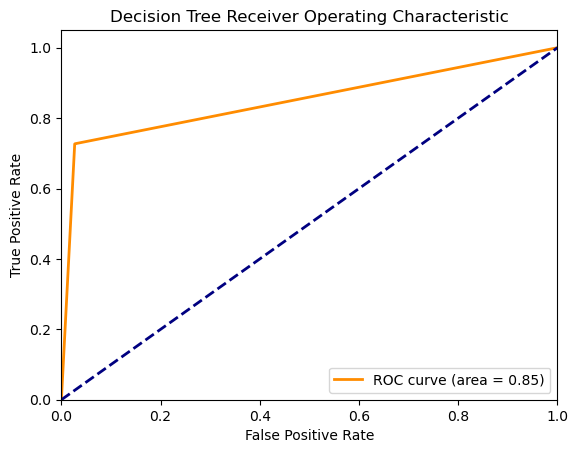

In [22]:
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [23]:
# Print confusion matrix and ROC curve for Random Forest
cm_rf = confusion_matrix(y_val, y_pred_rf)
print("Random Forest Confusion Matrix:\n", cm_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_val, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
print("Random Forest ROC AUC:", roc_auc_rf)

Random Forest Confusion Matrix:
 [[18466    72]
 [  454  1008]]
Random Forest ROC AUC: 0.9481322905485373


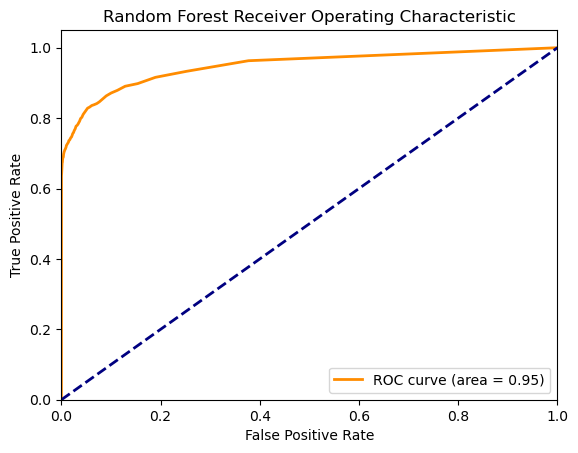

In [24]:
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [25]:
# Print classification report for both Decision Tree and Random Forest
print("Decision Tree Classification Report:\n", classification_report(y_val, y_pred_dt))
print("Random Forest Classification Report:\n", classification_report(y_val, y_pred_rf))


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98     18538
           1       0.68      0.73      0.70      1462

    accuracy                           0.96     20000
   macro avg       0.83      0.85      0.84     20000
weighted avg       0.96      0.96      0.96     20000

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     18538
           1       0.93      0.69      0.79      1462

    accuracy                           0.97     20000
   macro avg       0.95      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



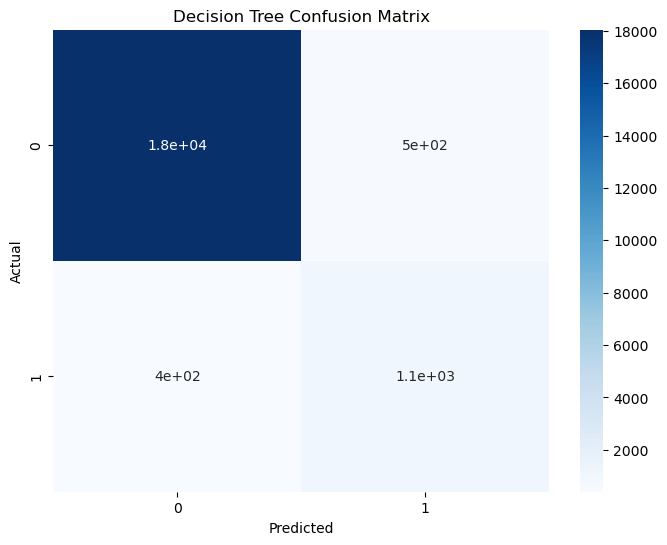

In [26]:
# Plot the confusion matrix for Decision Tree
plt.figure(figsize=(8,6))
sns.heatmap(cm_dt, annot=True, cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

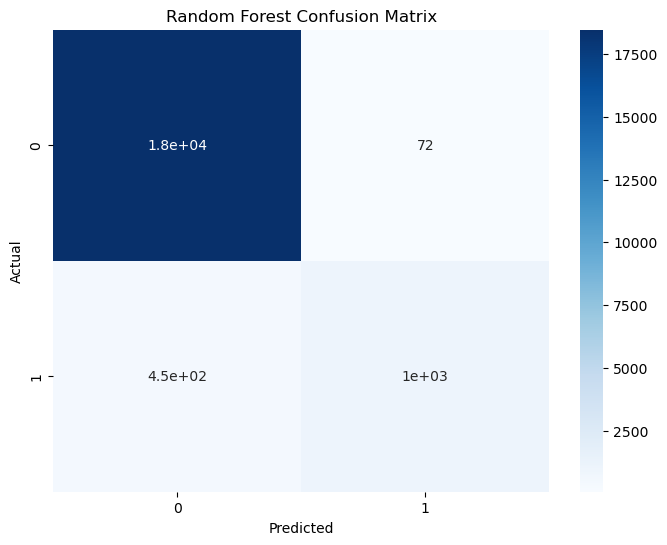

In [27]:
# Plot the confusion matrix for Random Forest
plt.figure(figsize=(8,6))
sns.heatmap(cm_rf, annot=True, cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

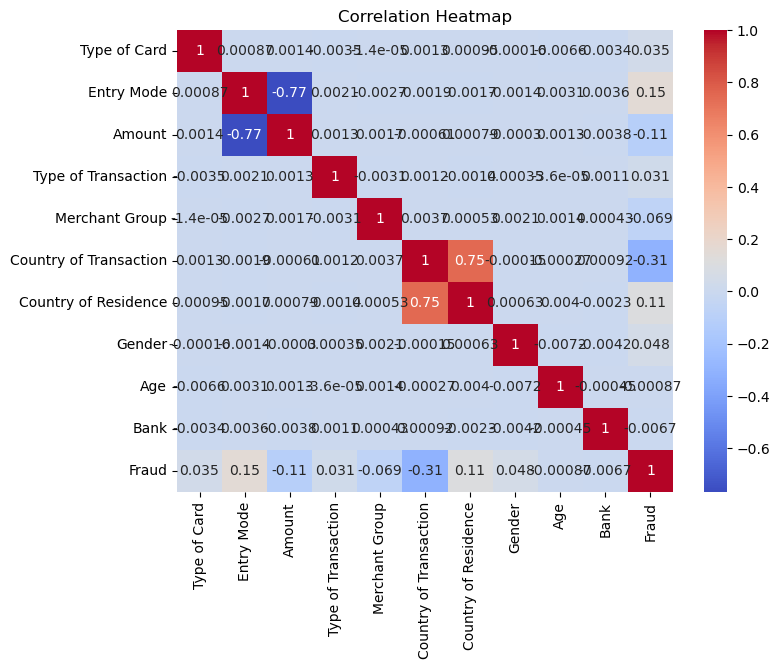

In [28]:
#heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()
